<a href="https://colab.research.google.com/github/Vikas5050/Underwater-Image-Processing/blob/main/retinex_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

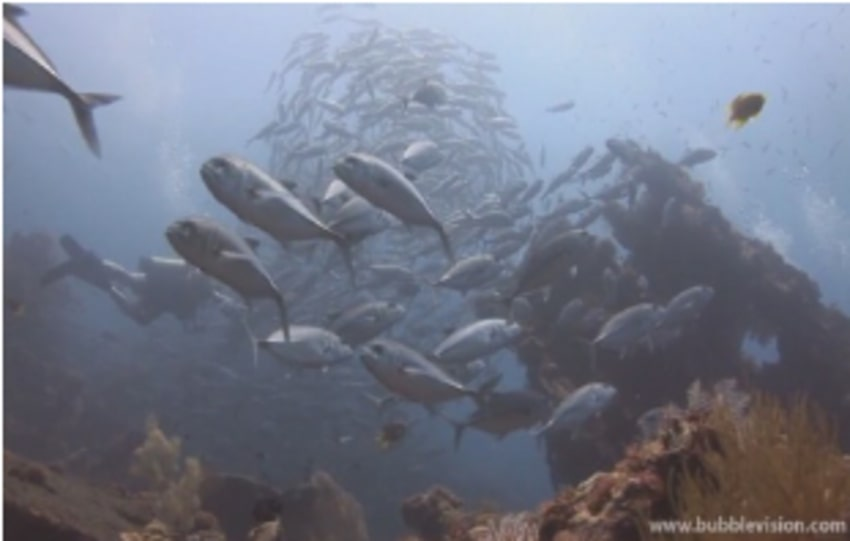

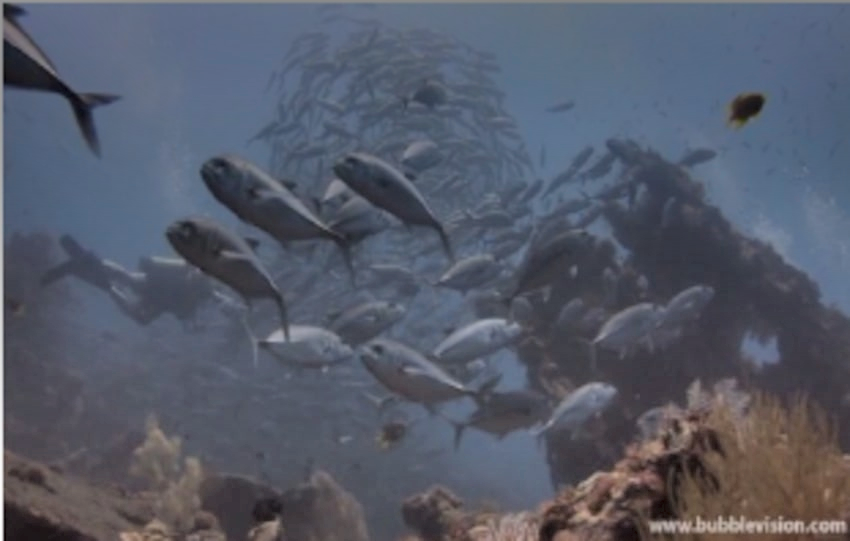

In [ ]:
import cv2
import numpy as np

def retinex_single_scale(image, sigma):
    # Convert image to float32
    image = np.float32(image)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)

    # Avoid division by zero
    blurred[blurred == 0] = 1

    # Calculate the log of the image and blurred image
    log_image = np.log(image)
    log_blurred = np.log(blurred)

    # Compute the Retinex image
    retinex = log_image - log_blurred

    # Scale Retinex values to 0-255
    retinex = cv2.normalize(retinex, None, 0, 255, cv2.NORM_MINMAX)

    # Convert back to uint8
    retinex = np.uint8(retinex)

    return retinex

def underwater_image_enhancement_retinex(image, sigma=100):
    # Convert image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split LAB channels
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Apply Retinex algorithm to the luminance channel
    enhanced_l = retinex_single_scale(l_channel, sigma)

    # Merge LAB channels
    enhanced_lab = cv2.merge((enhanced_l, a_channel, b_channel))

    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

    return enhanced_image

# Example usage
if __name__ == "__main__":
    # Load underwater image
    image_path = "underwater_image.jpg"
    image = cv2.imread(image_path)

    # Enhance image using Retinex method
    enhanced_image = underwater_image_enhancement_retinex(image)

    # Display the original and enhanced images
    from google.colab.patches import cv2_imshow
    cv2_imshow(image)
    cv2_imshow(enhanced_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
